# Fluxes


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
/bin/rm -rf ./param/*par
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 6436 repro
download_chandra_obsid 6436 evt1,pbk,bias,bpix,flt,fov,msk,mtl,stat,asol,dtf

chandra_repro 6436 out=`pwd`/repro clob+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      105 Mb  ####################            2 s  53101.4 kb/s
  asol     fits        8 Mb  ####################          < 1 s  35116.6 kb/s
  mtl      fits        1 Mb  ####################          < 1 s  40210.3 kb/s
  stat     fits        1 Mb  ####################          < 1 s  33533.5 kb/s
  bias     fits      499 Kb  ####################          < 1 s  22525.2 kb/s
  bias     fits      446 Kb  ####################          < 1 s  12550.3 kb/s
  bias     fits      444 Kb  ####################          < 1 s  22187.0 kb/s
  bias     fits      443 Kb  ####################          < 1 s  17244.9 kb/s
  bias     fits      442 Kb  ####################          < 1 s  23156.2 kb/s
  bias     fits      441 Kb  ####################          < 1 s  16420.8 kb/s
  bpix     fits       64 Kb  ####################    

## Quick Look

In [3]:
dmcopy "repro/acisf06436_repro_evt2.fits[ccd_id=0:3]" acis_i.fits clob+
fluximage acis_i.fits fimg/ bands=broad,csc bin=4 clob+ psfecf=0.393

Running fluximage
Version: 04 November 2021

Using CSC ACIS broad science energy band.
Using CSC ACIS soft science energy band.
Using CSC ACIS medium science energy band.
Using CSC ACIS hard science energy band.
Aspect solution repro/pcadf06436_000N001_asol1.fits found.
Bad-pixel file repro/acisf06436_repro_bpix1.fits found.
Mask file repro/acisf06436_000N003_msk1.fits found.

The output images will have 566 by 565 pixels, pixel size of 1.968 arcsec,
    and cover x=2916.5:5180.5:4,y=3012.5:5272.5:4.

Running tasks in parallel with 4 processors.
Creating 4 aspect histograms for obsid 6436
Creating 16 instrument maps for obsid 6436
Creating 16 exposure maps for obsid 6436
Combining 4 exposure maps for 4 bands (obsid 6436)
Thresholding data for obsid 6436
Exposure-correcting 4 images for obsid 6436
Creating 4 PSF maps for obsid 6436

The following files were created:

 The clipped counts images are:
     fimg/broad_thresh.img
     fimg/soft_thresh.img
     fimg/medium_thresh.img
     fim

In [4]:
cat << EOM > src.reg
circle(3423,3795,20)
EOM

[1] 10228
[1]+  Done                    ds9 -rgb -red fimg/soft_flux.img -green fimg/medium_flux.img -blue fimg/hard_flux.img -rgb lock scale yes -rgb lock smooth yes -log -smooth -region src.reg -saveimage png ds9_01.png


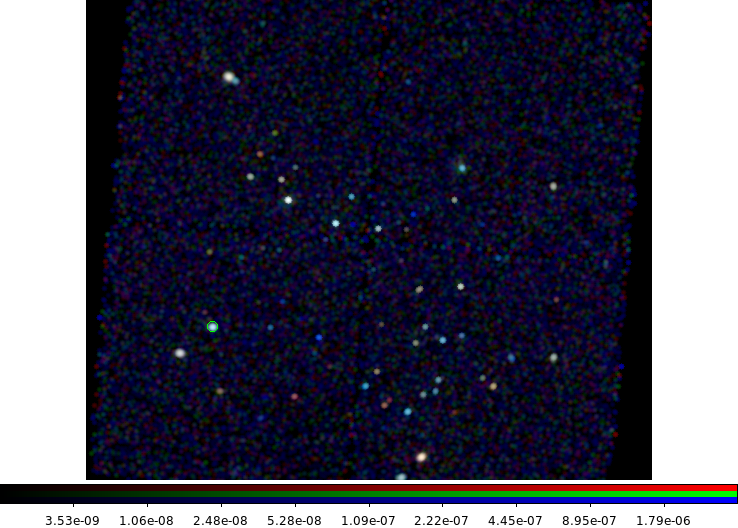

In [5]:
ds9 -rgb -red fimg/soft_flux.img \
         -green fimg/medium_flux.img \
         -blue fimg/hard_flux.img \
         -rgb lock scale yes -rgb lock smooth yes -log -smooth \
         -region src.reg\
         -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

        
display < ds9_01.png


## A single Source

In [6]:
dmstat "fimg/broad_flux.img[sky=region(src.reg)]" cen+ verb=1
xc=`stk_read_num ')dmstat.out_cntrd_phys' 1 echo+`
yc=`stk_read_num ')dmstat.out_cntrd_phys' 2 echo+`
echo "Centroid: $xc $yc"


PFLUX_IMAGE(x, y)[/cm**2 /s]
    min:	0 	      @:	( 3414.5 3778.5 )
    max:	3.2662243029e-05 	      @:	( 3422.5 3794.5 )
cntrd[log] :	( 6.3121935222 6.351405338 )
cntrd[phys]:	( 3423.7487741 3795.9056214 )
sigma_cntrd:	( 0.0097475444081 0.0097340885214 )
   good:	77 
   null:	44 
Centroid: 3423.7487741 3795.9056214


In [7]:
dmstat "fimg/broad_flux.img[sky=region(src.reg)]" cen+

PFLUX_IMAGE(x, y)[/cm**2 /s]
    min:	0 	      @:	( 3414.5 3778.5 )
    max:	3.2662243029e-05 	      @:	( 3422.5 3794.5 )
cntrd[log] :	( 6.3121935222 6.351405338 )
cntrd[phys]:	( 3423.7487741 3795.9056214 )
sigma_cntrd:	( 0.0097475444081 0.0097340885214 )
   good:	77 
   null:	44 


In [ ]:
#ds9 fimg/broad_flux.img -pan to $xc $yc physical 

In [8]:
punlearn dmcoords
dmcoords fimg/broad_flux.img opt=sky x=$xc y=$yc
ra=`pget dmcoords ra`
dec=`pget dmcoords dec`
echo "$ra $dec"

03:29:29.252 +31:18:34.62


### Now run `srcflux`

In [9]:
punlearn srcflux
srcflux repro/acisf06436_repro_evt2.fits "$ra $dec" single/run1 clob+ 

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = 03:29:29.252 +31:18:34.62
         outroot = single/run1
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = ideal
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Setting Ideal PSF : alpha=1 , beta=0
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running 

In [10]:
dmlist single/run1_broad.flux"[cols net_rate_aper,net_flux_aper,net_mflux_aper,net_umflux_aper]" data,clean

#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.03917760      4.975567703E-13      4.379663904E-13      5.380651584E-13


In [11]:
dmlist single/run1_broad.flux"[cols net_flux_aper,net_flux_aper_lo,net_flux_aper_hi]" data,clean

#  NET_FLUX_APER        NET_FLUX_APER_LO     NET_FLUX_APER_HI
      4.975567703E-13      4.759146459E-13       5.19330975E-13


In [12]:
dmlist single/run1_broad.flux"[cols shape,r,area,bg_area]" data,clean

#  SHAPE              R[2]                                     AREA                 BG_AREA
 Circle                        9.624140                    0              290.250             6981.750


In [13]:
dmlist single/run1_broad.flux"[cols theta,phi]" data,clean

#  THETA                PHI
         6.0420333736       298.7815830774


In [14]:
dmlist single/run1_broad.flux"[cols theta,phi]" cols

 
--------------------------------------------------------------------------------
Columns for Table Block HISTOGRAM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   THETA                arcmin       Real8          -Inf:+Inf            Off axis angle
   2   PHI                  deg          Real8          -Inf:+Inf            Azimuth angle


In [15]:
dmlist single/run1_broad.flux"[cols psffrac,bg_psffrac]" data,clean

#  PSFFRAC              BG_PSFFRAC
                  1.0                    0


In [16]:
ls -1 single/run1_*

single/run1_0001.arf
single/run1_0001.pi
single/run1_0001.rmf
single/run1_0001_6436.fov
single/run1_0001_bkg.pi
single/run1_0001_bkgreg.fits
single/run1_0001_broad_flux.img
single/run1_0001_broad_rates.prob
single/run1_0001_broad_thresh.expmap
single/run1_0001_broad_thresh.img
single/run1_0001_grp.pi
single/run1_0001_nopsf.arf
single/run1_0001_reg.fits
single/run1_0001_srcreg.fits
single/run1_broad.flux
single/run1_summary.txt


read ARF file single/run1_0001.arf
read RMF file single/run1_0001.rmf
read ARF (background) file single/run1_0001.arf
read RMF (background) file single/run1_0001.rmf
read background file single/run1_0001_bkg.pi
4.22828884610271e-09
4.384556677e-13


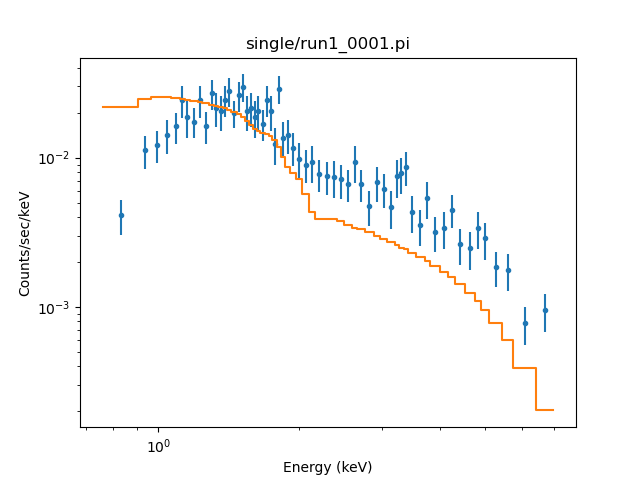

In [17]:
cat << EOM > s1.py
from sherpa.astro.ui import *

load_data("single/run1_0001.pi")
subtract()
group_counts(20)
ignore(None, 0.6)
ignore(7,None)
set_source(xsphabs.abs1 * xspowerlaw.pow1)
abs1.nh = 0
pow1.phoindex = 2
print(calc_energy_flux(0.5, 7))
f0 = calc_energy_flux(0.5, 7)
pow1.norm.val *= 4.384556677E-13 / f0
print(calc_energy_flux(0.5, 7))
plot_fit()

import matplotlib.pylab as plt
plt.xscale('log')
plt.yscale('log')
plt.savefig('sherpa_01.png')

EOM

python s1.py
display < sherpa_01.png


## Correct for Absorption

In [18]:
ra_1=`echo "${ra}" | tr ":" " "`
dec_1=`echo "${dec}" | tr ":" " "`
prop_colden d nrao eval $ra_1 $dec_1

Looking for /export/miniconda/envs/ciao-4.14/config/jcm_data/nrao.fits
------------------------------------------------------------------------------------------
Input coords:  03 29 29.25 +31 18 34.62
Target RA,Dec (B1950): 03 26 23.597 +31 08 17.471   (l,b):158.397679   -20.466884
Density integrated from   -550.000 to    550.000 km/s
Hydrogen density (10^20 cm**(-2)):  14.64
------------------------------------------------------------------------------------------


In [19]:
pset srcflux model=xspowerlaw.pow1 paramvals="pow1.phoindex=2"
pset srcflux absmodel=xsphabs.abs1 absparams="abs1.nh=0.1464"
srcflux repro/acisf06436_repro_evt2.fits "$ra $dec" single/run2 clob+


srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = 03:29:29.252 +31:18:34.62
         outroot = single/run2
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = ideal
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.phoindex=2
        absmodel = xsphabs.abs1
       absparams = abs1.nh=0.1464
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Setting Ideal PSF : alpha=1 , beta=0
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running t

In [21]:
dmlist single/run\*_broad.flux"[cols net_rate_aper,net_flux_aper,net_mflux_aper,net_umflux_aper]" data,clean

#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.03917760      4.975567703E-13      4.379663904E-13      5.380651584E-13
#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.03917760      4.975567703E-13      4.379663904E-13      5.380651584E-13
#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.04507770      5.724875012E-13      5.039236083E-13      6.190971318E-13
#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.04559010      5.789950228E-13      5.096517279E-13      6.261344334E-13
#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.04319040      5.593486833E-13      4.849418112E-13      5.957683776E-13


## PSF correction

In [22]:
srcflux repro/acisf06436_repro_evt2.fits "$ra $dec" single/run3 psfmethod=quick clob+

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = 03:29:29.252 +31:18:34.62
         outroot = single/run3
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = quick
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.phoindex=2
        absmodel = xsphabs.abs1
       absparams = abs1.nh=0.1464
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running tasks in parallel with 4 processors.
R

In [23]:
dmlist "single/run3_broad.flux[cols shape,r,area,bg_area]" data,clean

#  SHAPE              R[2]                                     AREA                 BG_AREA
 Circle                        9.624140                    0              290.250             6981.750


In [24]:
dmlist "single/run3_broad.flux[cols psffrac,bg_psffrac]" data,clean

#  PSFFRAC              BG_PSFFRAC
     0.86911376973698                    0


In [25]:
dmlist "single/run\*_broad.flux[cols net_rate_aper,net_flux_aper,net_mflux_aper,net_umflux_aper]" data,clean

#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.03917760      4.975567703E-13      4.379663904E-13      5.380651584E-13
#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.03917760      4.975567703E-13      4.379663904E-13      5.380651584E-13
#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.04507770      5.724875012E-13      5.039236083E-13      6.190971318E-13
#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.04559010      5.789950228E-13      5.096517279E-13      6.261344334E-13
#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.04319040      5.593486833E-13      4.849418112E-13      5.957683776E-13


In [26]:
srcflux repro/acisf06436_repro_evt2.fits "$ra $dec" single/run4 psfmethod=arfcorr clob+

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = 03:29:29.252 +31:18:34.62
         outroot = single/run4
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = arfcorr
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.phoindex=2
        absmodel = xsphabs.abs1
       absparams = abs1.nh=0.1464
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Combining PSF fractions together
Getting net rate and confidence limits
Getting model independent flu

In [27]:
dmlist "single/run4_broad.flux[cols psffrac,bg_psffrac]" data,clean

#  PSFFRAC              BG_PSFFRAC
     0.86415357249724     0.11565451978130


In [28]:
dmlist "single/run4_broad.flux[cols net_rate_aper,net_flux_aper,net_mflux_aper,net_umflux_aper]" data,clean

#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
           0.04559010      5.789950228E-13      5.096517279E-13      6.261344334E-13


## Specify region

In [29]:
cat << EOM > src.reg
circle(3423,3795,20)
EOM

cat << EOM > bg.reg
annulus(3423,3795,30,60)
EOM

In [30]:
srcflux repro/acisf06436_repro_evt2.fits "$ra $dec" single/run5 src=src.reg bkgreg=bg.reg psfmethod=arfcorr clob+

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = 03:29:29.252 +31:18:34.62
         outroot = single/run5
           bands = default
          srcreg = src.reg
          bkgreg = bg.reg
         bkgresp = yes
       psfmethod = arfcorr
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.phoindex=2
        absmodel = xsphabs.abs1
       absparams = abs1.nh=0.1464
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Combining PSF fractions together
Getting net rate and confidence limits
Getting model in

In [31]:
dmlist single/run5_broad.flux"[cols psffrac,bg_psffrac]" data,clean

#  PSFFRAC              BG_PSFFRAC
     0.97200144088498     0.00303585880048


## Upper limits

In [32]:
punlearn srcflux
srcflux repro/acisf06436_repro_evt2.fits "3:29:01.24 +31:19:30.72" ulim/src clob+

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = 3:29:01.24 +31:19:30.72
         outroot = ulim/src
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = ideal
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Setting Ideal PSF : alpha=1 , beta=0
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running tasks

In [33]:
dmlist ulim/src_broad.flux"[cols upper_limit]" data,clean

#  UPPER_LIMIT
  TRUE 


In [34]:
dmlist ulim/src_broad.flux"[cols net_rate_aper,net_flux_aper,net_mflux_aper]" data,clean

#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER
                    0                  NaN                    0


In [35]:
dmlist ulim/src_broad.flux"[cols net_rate_aper_hi,net_flux_aper_hi,net_mflux_aper_hi]" data,clean

#  NET_RATE_APER_HI     NET_FLUX_APER_HI     NET_MFLUX_APER_HI
          6.31156E-05                  NaN      6.215624288E-16


## Off Chip

In [36]:
punlearn srcflux
srcflux repro/acisf06436_repro_evt2.fits "3:29:48 +31:27:20" offchip/run1 clob+

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = 3:29:48 +31:27:20
         outroot = offchip/run1
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = ideal
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Setting Ideal PSF : alpha=1 , beta=0
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running tasks i

In [37]:
dmlist "offchip/run1_broad.flux[cols inside_fov,upper_limit,net_rate_aper,net_rate_aper_lo,net_rate_aper_hi]" data,clean

#  INSIDE_FOV UPPER_LIMIT NET_RATE_APER        NET_RATE_APER_LO     NET_RATE_APER_HI
  FALSE  FALSE                  NaN                  NaN                  NaN


In [38]:
dmlist "offchip/run1_broad.flux[cols shape,x,y,r,area,bg_area]" data,clean

#  SHAPE              sky(X,Y)                                 R[2]                                     AREA                 BG_AREA
 Point                                 0                    0                    0                    0                    0            3887.8750


In [39]:
srcflux repro/acisf06436_repro_evt2.fits "3:29:43.5 +31:26:35" overlap/run1 clob+

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = 3:29:43.5 +31:26:35
         outroot = overlap/run1
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = ideal
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Setting Ideal PSF : alpha=1 , beta=0
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running tasks

In [40]:
dmlist "overlap/run1_broad.flux[cols shape,x,y,r,area,bg_area]" data,clean

#  SHAPE              sky(X,Y)                                 R[2]                                     AREA                 BG_AREA
 Circle                               3054.120      4772.750            23.37850                    0              1352.50          22675.43750


In [41]:
dmlist "overlap/run1_broad.flux[cols inside_fov,upper_limit,near_chip_edge]" data,clean

#  INSIDE_FOV UPPER_LIMIT NEAR_CHIP_EDGE
  TRUE   TRUE   TRUE 


In [42]:
dmlist "overlap/run1_broad.flux[cols net_rate_aper,net_rate_aper_lo,net_rate_aper_hi]" data,clean

#  NET_RATE_APER        NET_RATE_APER_LO     NET_RATE_APER_HI
                    0                  NaN          0.000117733


In [43]:
dmlist single/run1_broad.flux blocks

 
--------------------------------------------------------------------------------
Dataset: single/run1_broad.flux
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: HISTOGRAM                      Table        64 cols x 1        rows
Block    3: GTI3                           Table         2 cols x 1        rows
Block    4: GTI6                           Table         2 cols x 1        rows
Block    5: GTI7                           Table         2 cols x 1        rows
Block    6: GTI2                           Table         2 cols x 1        rows
Block    7: GTI1                           Table         2 cols x 1        rows
Block    8: GTI0                           Table         2 cols x 3        rows


In [44]:
dmlist single/run1_broad.flux cols

 
--------------------------------------------------------------------------------
Columns for Table Block HISTOGRAM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   sky(X,Y)             pixel        Real8          -Inf:+Inf            Position
   2   EQPOS(RA,Dec)        deg          Real8          -360.0:      360.0   Position
   3   SHAPE                             String[16]                          Region shape type
   4   R[2]                 pixel        Real8(2)       -Inf:+Inf            Radius
   5   RMID                 pixel        Real8          -Inf:+Inf            Mean of valid R[2] values
   6   ROTANG[2]            pixel        Real8(2)       -Inf:+Inf            Angle
   7   COMPONENT                         Int2           -                    Component number
   8   COUNTS               count        Real8          -Inf:+Inf            Counts
   9   ERR_COUNTS     

## Source List

In [45]:
mkdir -p csc2
search_csc ngc1333 10 csc2/ngc1333.tsv clob+ cat=csc2 verb=1 radunit=arcmin

search_csc
             pos = ngc1333
          radius = 10
         outfile = csc2/ngc1333.tsv
         radunit = arcmin
         columns = INDEF
     sensitivity = no
        download = none
            root = ./
           bands = broad,wide
       filetypes = regevt,pha,arf,rmf,lc,psf,regexp
         catalog = csc2
         verbose = 1
         clobber = yes
            mode = ql


430 rows returned by query
145 Different Master Source(s).
3 Different Observation(s).

name                	ra          	dec         	sepn	obsid	
 2CXO J032828.8+311719	5.212038e+01	3.128870e+01	9.1'	 6436	
 2CXO J032828.8+311719	5.212038e+01	3.128870e+01	9.1'	 6437	
 2CXO J032828.8+312036	5.212008e+01	3.134359e+01	9.3'	 6436	
 2CXO J032828.8+312036	5.212008e+01	3.134359e+01	9.3'	 6437	
 2CXO J032828.8+312036	5.212008e+01	3.134359e+01	9.3'	  642	
 2CXO J032831.2+311841	5.213022e+01	3.131164e+01	8.5'	 6436	
 2CXO J032831.2+311841	5.213022e+01	3.131164e+01	8.5'	 6437	
 2CXO J032831.2+311841	5.213022e+01	3

 2CXO J032855.2+311735	5.223014e+01	3.129321e+01	3.6'	  642	
 2CXO J032856.1+311907	5.223378e+01	3.131888e+01	3.3'	  642	
 2CXO J032856.1+311907	5.223378e+01	3.131888e+01	3.3'	 6436	
 2CXO J032856.1+311907	5.223378e+01	3.131888e+01	3.3'	 6437	
 2CXO J032856.2+311745	5.223425e+01	3.129591e+01	3.3'	 6436	
 2CXO J032856.2+311745	5.223425e+01	3.129591e+01	3.3'	 6437	
 2CXO J032856.2+311745	5.223425e+01	3.129591e+01	3.3'	  642	
 2CXO J032856.2+312227	5.223458e+01	3.137439e+01	5'	 6436	
 2CXO J032856.2+312227	5.223458e+01	3.137439e+01	5'	 6437	
 2CXO J032856.2+312227	5.223458e+01	3.137439e+01	5'	  642	
 2CXO J032856.5+312240	5.223565e+01	3.137784e+01	5.1'	  642	
 2CXO J032856.5+312240	5.223565e+01	3.137784e+01	5.1'	 6436	
 2CXO J032856.5+312240	5.223565e+01	3.137784e+01	5.1'	 6437	
 2CXO J032856.6+311835	5.223596e+01	3.130983e+01	3.1'	  642	
 2CXO J032856.6+311835	5.223596e+01	3.130983e+01	3.1'	 6436	
 2CXO J032856.6+311835	5.223596e+01	3.130983e+01	3.1'	 6437	
 2CXO J032856.8+311810	5.22367

 2CXO J032910.3+312159	5.229323e+01	3.136641e+01	3.4'	 6436	
 2CXO J032910.3+312159	5.229323e+01	3.136641e+01	3.4'	 6437	
 2CXO J032910.5+312201	5.229408e+01	3.136706e+01	3.4'	  642	
 2CXO J032910.5+312201	5.229408e+01	3.136706e+01	3.4'	 6436	
 2CXO J032910.5+312201	5.229408e+01	3.136706e+01	3.4'	 6437	
 2CXO J032910.7+312230	5.229494e+01	3.137502e+01	3.9'	  642	
 2CXO J032910.7+312230	5.229494e+01	3.137502e+01	3.9'	 6436	
 2CXO J032910.7+312230	5.229494e+01	3.137502e+01	3.9'	 6437	
 2CXO J032911.3+311717	5.229714e+01	3.128819e+01	1.3'	  642	
 2CXO J032911.3+311717	5.229714e+01	3.128819e+01	1.3'	 6436	
 2CXO J032911.3+311717	5.229714e+01	3.128819e+01	1.3'	 6437	
 2CXO J032911.6+312540	5.229854e+01	3.142785e+01	7.1'	 6436	
 2CXO J032911.6+312540	5.229854e+01	3.142785e+01	7.1'	 6437	
 2CXO J032911.6+312540	5.229854e+01	3.142785e+01	7.1'	  642	
 2CXO J032911.8+312127	5.229948e+01	3.135751e+01	2.9'	  642	
 2CXO J032911.8+312127	5.229948e+01	3.135751e+01	2.9'	 6436	
 2CXO J032911.8+312127	5

 2CXO J032926.8+312647	5.236177e+01	3.144650e+01	8.8'	 6436	
 2CXO J032926.8+312647	5.236177e+01	3.144650e+01	8.8'	 6437	
 2CXO J032928.1+311628	5.236735e+01	3.127462e+01	4.2'	 6436	
 2CXO J032928.1+311628	5.236735e+01	3.127462e+01	4.2'	 6437	
 2CXO J032928.1+311628	5.236735e+01	3.127462e+01	4.2'	  642	
 2CXO J032929.2+311834	5.237194e+01	3.130963e+01	3.8'	  642	
 2CXO J032929.2+311834	5.237194e+01	3.130963e+01	3.8'	 6436	
 2CXO J032929.2+311834	5.237194e+01	3.130963e+01	3.8'	 6437	
 2CXO J032929.7+312102	5.237403e+01	3.135074e+01	4.6'	  642	
 2CXO J032929.7+312102	5.237403e+01	3.135074e+01	4.6'	 6436	
 2CXO J032929.7+312102	5.237403e+01	3.135074e+01	4.6'	 6437	
 2CXO J032930.3+311903	5.237657e+01	3.131775e+01	4.1'	 6436	
 2CXO J032930.3+311903	5.237657e+01	3.131775e+01	4.1'	 6437	
 2CXO J032930.3+311903	5.237657e+01	3.131775e+01	4.1'	  642	
 2CXO J032930.4+312726	5.237693e+01	3.145746e+01	9.7'	  642	
 2CXO J032930.4+312726	5.237693e+01	3.145746e+01	9.7'	 6436	
 2CXO J032930.4+312726	5

In [46]:
dmcopy csc2/ngc1333.tsv"[opt kernel=text/tsv][cols name,ra,dec]" csc2.fits clob+
dmlist csc2.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block ngc1333.tsv
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   name                              String[22]                          Source name in the format '2CXO Jhhmmss.s{+|-}d
   2   ra                   deg          Real4          -Inf:+Inf            Source position, ICRS right ascension
   3   dec                  deg          Real4          -Inf:+Inf            Source position, ICRS declination


[1] 20040
[1]+  Done                    ds9 fimg/broad_flux.img -view colorbar no -bin factor 2 -scale log -smooth -catalog import tsv csc2/ngc1333.tsv -saveimage png ds9_02.png


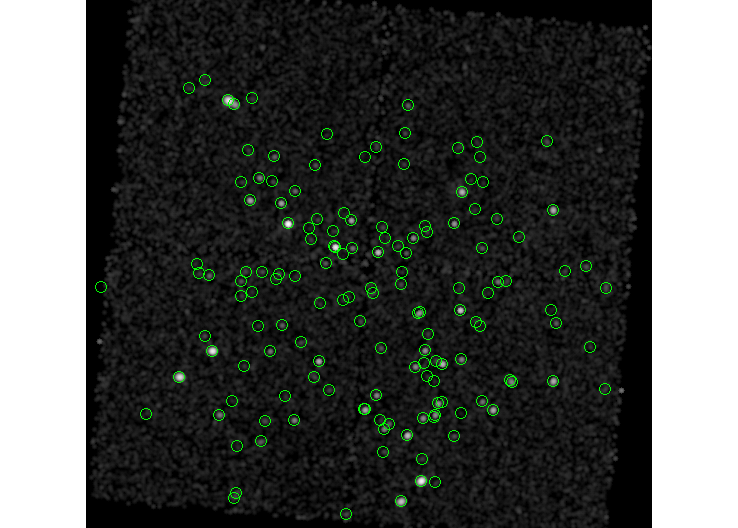

In [47]:
ds9 fimg/broad_flux.img -view colorbar no \
  -bin factor 2 -scale log -smooth \
  -catalog import tsv csc2/ngc1333.tsv \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

## Run wavdetect

In [48]:
###mkpsfmap fimg/broad_thresh.img fimg/broad_thresh.psfmap 1.49 ecf=0.393 clob+


In [49]:
dmlist fimg/broad_thresh.psfmap header,clean,raw | grep BUNIT

BUNIT        = arcsec               / Units after BSCALE applied


[1] 20218
[1]+  Done                    ds9 fimg/broad_thresh.psfmap -region repro/acisf06436_repro_fov1.fits -contour yes -contour levels "1 " -saveimage png ds9_03.png


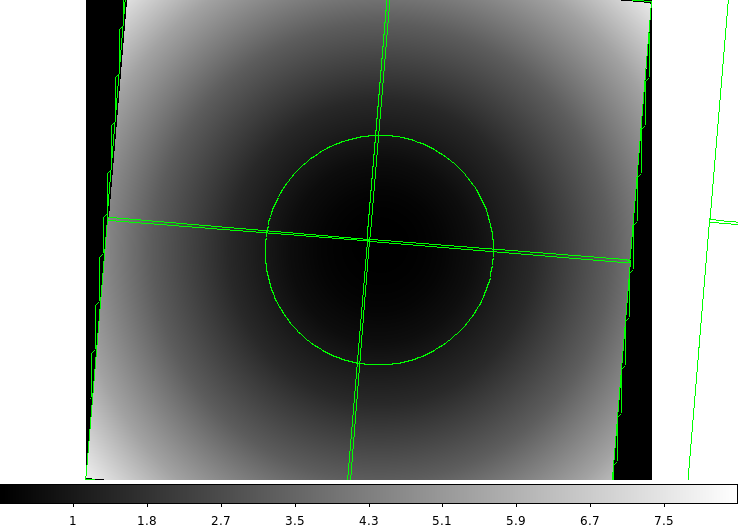

In [50]:
ds9 fimg/broad_thresh.psfmap -region repro/acisf06436_repro_fov1.fits \
         -contour yes -contour levels "1 " \
         -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit


display < ds9_03.png

In [51]:
mkdir -p wav
punlearn wavdetect
pset wavdetect psffile=fimg/broad_thresh.psfmap
pset wavdetect expfile=fimg/broad_thresh.expmap
pset wavdetect regfile=wav/src.reg
pset wavdetect scales="2 4 8 16"
wavdetect fimg/broad_thresh.img wav/src.fits wav/src.scell wav/src.img wav/src.nbkg mode=h clobber=yes
dmlist wav/src.fits counts

80      


[1] 20432
[1]+  Done                    ds9 fimg/broad_flux.img -region wav/src.fits -log -cmap b -saveimage png ds9_05.png


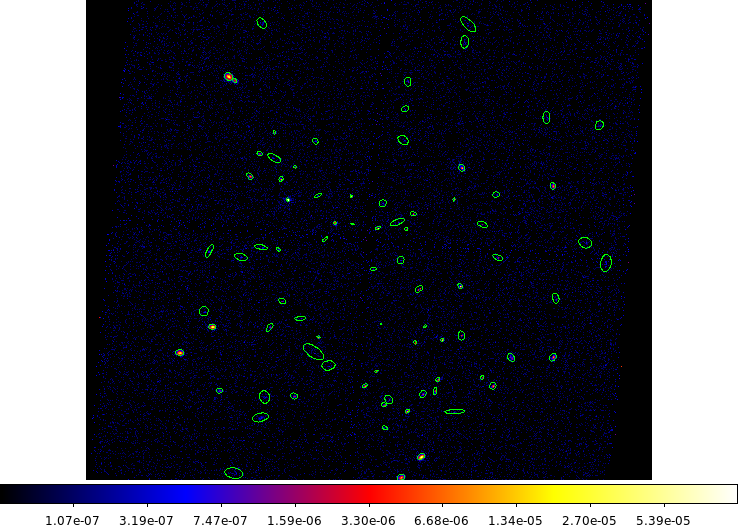

In [52]:
ds9 fimg/broad_flux.img -region wav/src.fits -log -cmap b \
  -saveimage png ds9_05.png &
sleep 10
xpaset -p ds9 quit


display < ds9_05.png 

In [53]:
mkdir -p sources
punlearn roi
pset roi group=exclude bkgfactor=1
pset roi outsrcfile="sources/src%02d.fits"
pset roi targetbkg=target
roi wav/src.fits "region(repro/acisf06436_repro_fov1.fits)" clob+ mode=h

In [54]:
ls -1 sources/src*fits | wc -l

80


In [55]:
dmlist sources/src01.fits blocks

 
--------------------------------------------------------------------------------
Dataset: sources/src01.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SRCREG                         Table         5 cols x 1        rows
Block    3: BKGREG                         Table         5 cols x 2        rows


In [58]:
dmlist wav/src.fits"[(x,y)=circle(3460,4780,40)][cols component,x,y]" data,clean

#  COMPONENT  POS(X,Y)
         73      3488.3357588358      4796.9054054054


[1] 20876
[1]+  Done                    ds9 fimg/broad_flux.img -log -region sources/src73.fits -pan to 3460 4780 -zoom 4 fimg/broad_flux.img -log -region "sources/src73.fits[bkgreg]" -pan to 3460 4780 -saveimage png ds9_06.png


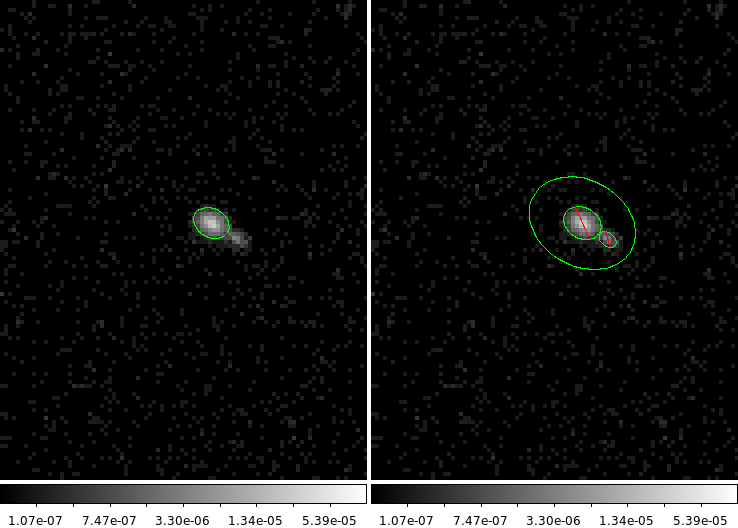

In [59]:
ds9 fimg/broad_flux.img -log -region sources/src73.fits \
     -pan to 3460 4780 -zoom 4 fimg/broad_flux.img -log \
     -region "sources/src73.fits[bkgreg]" -pan to 3460 4780 \
     -saveimage png ds9_06.png &
sleep 10
xpaset -p ds9 quit

 
display < ds9_06.png


In [60]:
splitroi sources/src\*fits sources/wav 

In [61]:
ls -1 sources/wav*reg

sources/wav.bg.reg
sources/wav.src.reg


## Multiple Sources

### Using catalog

In [62]:
punlearn srcflux
pset srcflux model=xspowerlaw.pow1 paramvals="pow1.phoindex=2"
pset srcflux absmodel=xsphabs.abs1 absparams="abs1.nh=0.1464"
###srcflux repro/acisf06436_repro_evt2.fits csc.fits"[#row=1,7,10,210,222]" \
###  multiple-csc/run clob+
srcflux repro/acisf06436_repro_evt2.fits csc2.fits"[#row=3,15,18,403,430]" \
  multiple-csc/run clob+  

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = csc2.fits[#row=3,15,18,403,430]
         outroot = multiple-csc/run
           bands = default
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = ideal
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.phoindex=2
        absmodel = xsphabs.abs1
       absparams = abs1.nh=0.1464
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = ql

Processing OBI 001
Extracting counts
Setting Ideal PSF : alpha=1 , beta=0
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes

3, 15, 18, 403, 430

[1] 24418
[1]+  Done                    ds9 fimg/broad_flux.img -log -cmap b fimg/broad_thresh.expmap -pan to 3:29:46 31:20:39 wcs fk5 -zoom 4 -match frame wcs -region load all multiple-csc/run_broad.flux -saveimage png ds9_07.png


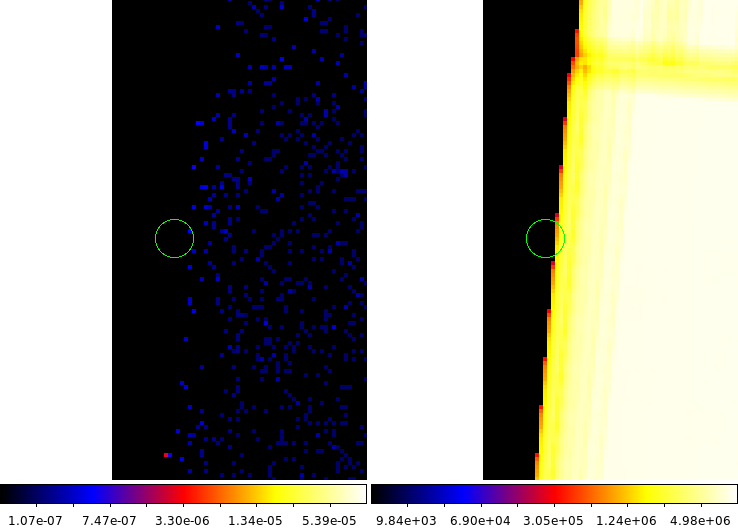

In [63]:
ds9 fimg/broad_flux.img -log -cmap b fimg/broad_thresh.expmap \
         -pan to 3:29:46 31:20:39 wcs fk5 -zoom 4 -match frame wcs \
         -region load all multiple-csc/run_broad.flux \
         -saveimage png ds9_07.png &
sleep 10
xpaset -p ds9 quit

display < ds9_07.png

In [64]:
dmlist multiple-csc/run_broad.flux"[cols near_chip_edge,inside_fov,upper_limit]" data,clean

#  NEAR_CHIP_EDGE INSIDE_FOV UPPER_LIMIT
  TRUE   TRUE   FALSE
  FALSE  TRUE   FALSE
  FALSE  TRUE   FALSE
  FALSE  TRUE   FALSE
  TRUE   FALSE  TRUE 


In [65]:
dmlist "multiple-csc/run_broad.flux[cols component,psffrac,bg_psffrac]" data,clean

#  COMPONENT  PSFFRAC              BG_PSFFRAC
          1                  1.0                    0
          2                  1.0                    0
          3                  1.0                    0
          4                  1.0                    0
          5                  1.0                    0


In [66]:
 dmlist "multiple-csc/run_broad.flux[cols net_rate_aper,net_flux_aper,net_mflux_aper,net_umflux_aper]" data,clean

#  NET_RATE_APER        NET_FLUX_APER        NET_MFLUX_APER       NET_UMFLUX_APER
          0.000314272      6.958363555E-15      5.836973856E-15      7.171372768E-15
          0.000585384      4.123242354E-15      6.870066624E-15      8.440651896E-15
          0.007054080        6.3107065E-14       8.29207104E-14      1.018750234E-13
            0.0390620      4.975631551E-13       4.36439726E-13       5.36204074E-13
                    0                  NaN                  NaN                  NaN


In [67]:
dmlist "multiple-csc/run_broad.flux[cols net_rate_aper,net_rate_aper_lo,net_rate_aper_hi]" data,clean

#  NET_RATE_APER        NET_RATE_APER_LO     NET_RATE_APER_HI
          0.000314272          0.000155482          0.000522684
          0.000585384          0.000387565          0.000834341
          0.007054080          0.006326250          0.007786340
            0.0390620           0.03736030           0.04077410
                    0                  NaN          7.83079E-05


In [68]:
dmlist "multiple-csc/run_broad.flux[cols net_umflux_aper,net_umflux_aper_lo,net_umflux_aper_hi]" data,clean

#  NET_UMFLUX_APER      NET_UMFLUX_APER_LO   NET_UMFLUX_APER_HI
      7.171372768E-15      3.547943758E-15       1.19271262E-14
      8.440651896E-15      5.588299735E-15      1.203036288E-14
      1.018750234E-13       9.13637025E-14      1.124503223E-13
       5.36204074E-13      5.128448381E-13      5.597060707E-13
                  NaN                  NaN                  NaN


In [69]:
dmlist "multiple-csc/run_broad.flux[component=4][cols x,y,r,net_rate_aper,net_rate_aper_lo,net_rate_aper_hi]" data,clean

#  sky(X,Y)                                 R[2]                                     NET_RATE_APER        NET_RATE_APER_LO     NET_RATE_APER_HI
                     3423.410      3796.0            9.630440                    0            0.0390620           0.03736030           0.04077410


In [70]:
dmlist "single/run2_broad.flux[cols x,y,r,net_rate_aper,net_rate_aper_lo,net_rate_aper_hi]" data,clean

#  sky(X,Y)                                 R[2]                                     NET_RATE_APER        NET_RATE_APER_LO     NET_RATE_APER_HI
                   3423.770      3795.910            9.624140                    0           0.03917760           0.03747350           0.04089210


### Using source and region fiels

In [71]:
punlearn srcflux
pset srcflux model=xspowerlaw.pow1 paramvals="pow1.phoindex=2"
pset srcflux absmodel=xsphabs.abs1 absparams="abs1.nh=0.1464"
pset srcflux psfmethod=arfcorr
pset srcflux srcreg=@-sources/wav.src.reg
pset srcflux bkgreg=@-sources/wav.bg.reg
srcflux repro/acisf06436_repro_evt2.fits wav/src.fits multiple-wav/run clob+ mode=h

srcflux
          infile = repro/acisf06436_repro_evt2.fits
             pos = wav/src.fits
         outroot = multiple-wav/run
           bands = default
          srcreg = @-sources/wav.src.reg
          bkgreg = @-sources/wav.bg.reg
         bkgresp = yes
       psfmethod = arfcorr
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.phoindex=2
        absmodel = xsphabs.abs1
       absparams = abs1.nh=0.1464
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = ./
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = h

Processing OBI 001
Extracting counts
Making PSF models 
Getting PSF fraction by running arfcorr 1
Getting PSF fraction by running arfcorr 2
Getting PSF fraction by run

Running aprates for multiple-wav/run_0065_broad_rates.par
Running aprates for multiple-wav/run_0066_broad_rates.par
Running aprates for multiple-wav/run_0067_broad_rates.par
Running aprates for multiple-wav/run_0068_broad_rates.par
Running aprates for multiple-wav/run_0069_broad_rates.par
Running aprates for multiple-wav/run_0070_broad_rates.par
Running aprates for multiple-wav/run_0071_broad_rates.par
Running aprates for multiple-wav/run_0072_broad_rates.par
Running aprates for multiple-wav/run_0073_broad_rates.par
Running aprates for multiple-wav/run_0074_broad_rates.par
Running aprates for multiple-wav/run_0075_broad_rates.par
Running aprates for multiple-wav/run_0076_broad_rates.par
Running aprates for multiple-wav/run_0077_broad_rates.par
Running aprates for multiple-wav/run_0078_broad_rates.par
Running aprates for multiple-wav/run_0079_broad_rates.par
Running aprates for multiple-wav/run_0080_broad_rates.par
Running eff2evt for multiple-wav/run_broad_0001_src.dat
Running eff2evt 

Running eff2evt for multiple-wav/run_broad_0051_bkg.dat
Running eff2evt for multiple-wav/run_broad_0052_bkg.dat
Running eff2evt for multiple-wav/run_broad_0053_bkg.dat
Running eff2evt for multiple-wav/run_broad_0054_bkg.dat
Running eff2evt for multiple-wav/run_broad_0055_bkg.dat
Running eff2evt for multiple-wav/run_broad_0056_bkg.dat
Running eff2evt for multiple-wav/run_broad_0057_bkg.dat
Running eff2evt for multiple-wav/run_broad_0058_bkg.dat
Running eff2evt for multiple-wav/run_broad_0059_bkg.dat
Running eff2evt for multiple-wav/run_broad_0060_bkg.dat
Running eff2evt for multiple-wav/run_broad_0061_bkg.dat
Running eff2evt for multiple-wav/run_broad_0062_bkg.dat
Running eff2evt for multiple-wav/run_broad_0063_bkg.dat
Running eff2evt for multiple-wav/run_broad_0064_bkg.dat
Running eff2evt for multiple-wav/run_broad_0065_bkg.dat
Running eff2evt for multiple-wav/run_broad_0066_bkg.dat
Running eff2evt for multiple-wav/run_broad_0067_bkg.dat
Running eff2evt for multiple-wav/run_broad_0068_


      Position                               0.5 - 7.0 keV                           
                                             Value        90% Conf Interval          
#0001|3 29 0.29 +31 13 38.4   Rate           0.0183 c/s (0.017,0.0196)               
                              Flux           1.97E-13 erg/cm2/s (1.83E-13,2.11E-13)  
                              Mod.Flux       2.12E-13 erg/cm2/s (1.97E-13,2.27E-13)  
                              Unabs Mod.Flux 2.61E-13 erg/cm2/s (2.42E-13,2.79E-13)  

#0002|3 28 57.20 +31 14 18.8  Rate           0.0626 c/s (0.0602,0.0649)              
                              Flux           5.52E-13 erg/cm2/s (5.31E-13,5.73E-13)  
                              Mod.Flux       7.38E-13 erg/cm2/s (7.1E-13,7.66E-13)   
                              Unabs Mod.Flux 9.06E-13 erg/cm2/s (8.73E-13,9.41E-13)  

#0003|3 29 2.77 +31 15 15.8   Rate           0.000385 c/s (0.000206,0.000627)        
                              Flux           9.29E-

                              Flux           1.2E-13 erg/cm2/s (1.09E-13,1.32E-13)   
                              Mod.Flux       9.32E-14 erg/cm2/s (8.46E-14,1.02E-13)  
                              Unabs Mod.Flux 1.15E-13 erg/cm2/s (1.04E-13,1.25E-13)  

#0025|3 29 12.93 +31 18 14.3  Rate           0.00689 c/s (0.00615,0.00763)           
                              Flux           1.42E-13 erg/cm2/s (1.27E-13,1.58E-13)  
                              Mod.Flux       6.89E-14 erg/cm2/s (6.15E-14,7.64E-14)  
                              Unabs Mod.Flux 8.47E-14 erg/cm2/s (7.56E-14,9.39E-14)  

#0026|3 28 51.02 +31 18 17.3  Rate           0.00184 c/s (0.00145,0.00223)           
                              Flux           2.68E-14 erg/cm2/s (2.11E-14,3.26E-14)  
                              Mod.Flux       2.19E-14 erg/cm2/s (1.72E-14,2.66E-14)  
                              Unabs Mod.Flux 2.69E-14 erg/cm2/s (2.11E-14,3.26E-14)  

#0027|3 29 29.25 +31 18 34.6  Rate           0.0441


#0048|3 29 7.75 +31 21 56.7   Rate           0.00129 c/s (0.000991,0.00165)          
                              Flux           6.2E-14 erg/cm2/s (4.76E-14,7.91E-14)   
                              Mod.Flux       1.41E-14 erg/cm2/s (1.08E-14,1.8E-14)   
                              Unabs Mod.Flux 1.73E-14 erg/cm2/s (1.33E-14,2.21E-14)  

#0049|3 28 47.75 +31 21 56.0  Rate           0.000507 c/s (0.000292,0.00077)         
                              Flux           1.56E-14 erg/cm2/s (9E-15,2.37E-14)     
                              Mod.Flux       5.51E-15 erg/cm2/s (3.18E-15,8.38E-15)  
                              Unabs Mod.Flux 6.77E-15 erg/cm2/s (3.91E-15,1.03E-14)  

#0050|3 29 10.38 +31 21 58.8  Rate           0.0387 c/s (0.0369,0.0404)              
                              Flux           4.03E-13 erg/cm2/s (3.85E-13,4.21E-13)  
                              Mod.Flux       3.79E-13 erg/cm2/s (3.62E-13,3.97E-13)  
                              Unabs Mod.Flux 4.66E-

                              Unabs Mod.Flux 9.68E-15 erg/cm2/s (6.55E-15,1.34E-14)  

#0072|3 29 25.83 +31 26 39.0  Rate           0.00755 c/s (0.00641,0.0087)            
                              Flux           9.4E-14 erg/cm2/s (7.98E-14,1.08E-13)   
                              Mod.Flux       8.18E-14 erg/cm2/s (6.95E-14,9.43E-14)  
                              Unabs Mod.Flux 1.01E-13 erg/cm2/s (8.54E-14,1.16E-13)  

#0073|3 29 26.80 +31 26 47.1  Rate           0.0557 c/s (0.0535,0.0578)              
                              Flux           4.77E-13 erg/cm2/s (4.59E-13,4.95E-13)  
                              Mod.Flux       6.03E-13 erg/cm2/s (5.8E-13,6.26E-13)   
                              Unabs Mod.Flux 7.41E-13 erg/cm2/s (7.12E-13,7.69E-13)  

#0074|3 28 50.46 +31 27 55.1  Rate           0.000437 c/s (0.000222,0.000702)        
                              Flux           4.12E-15 erg/cm2/s (2.09E-15,6.61E-15)  
                              Mod.Flux       4.76E-

In [72]:
dmlist "multiple-wav/run_broad.flux[inside_fov=false||upper_limit=true]" counts

0       


```python
cr = read_file("multiple-wav/run_broad.flux")
cpt = cr.get_column("COMPONENT").values
umflux = cr.get_column("NET_UMFLUX_APER").values
umflux_lo = cr.get_column("NET_UMFLUX_APER_LO").values
umflux_hi = cr.get_column("NET_UMFLUX_APER_HI").values
add_window(8, 6, 'inches')
add_curve(cpt, umflux, [umflux_lo, umflux_hi], ['line.style', 'noline'])
log_scale(Y_AXIS)
umflux_units = cr.get_column("NET_UMFLUX_APER").unit
set_plot_ylabel("Unabsorbed flux ({})".format(umflux_units))
set_yaxis(['offset.perpendicular', 70, 'label.size', 16])
hide_axis('ax1')
split(2, 1, 0)
theta = cr.get_column("THETA").values
theta_units = cr.get_column("THETA").unit
add_curve(cpt, theta, ['line.style', 'noline'])
set_plot_ylabel("Off axis angle ({})".format(theta_units))
set_yaxis(['offset.perpendicular', 70, 'label.size', 16])
set_plot_xlabel("Source number")
set_xaxis(['label.size', 16])
print_window("chips_02.png","export.clobber=True")
```

```bash
chips -b c1.py
display < chips_02.png
```

![chips_02.png](chips_02.png)

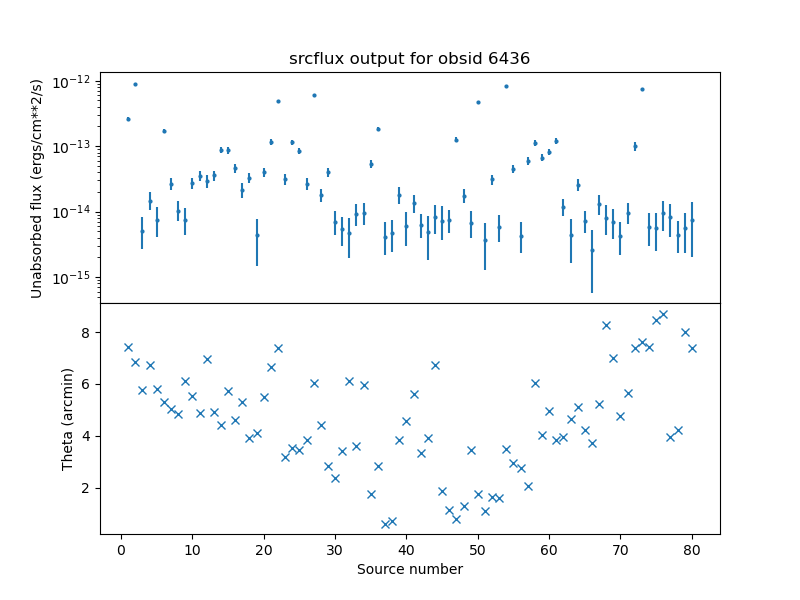

In [73]:
cat << EOM > plot_it.py
from pycrates import read_file
import matplotlib.pylab as plt

cr = read_file("multiple-wav/run_broad.flux")
cpt = cr.get_column("COMPONENT").values
umflux = cr.get_column("NET_UMFLUX_APER").values
umflux_units = cr.get_column("NET_UMFLUX_APER").unit
umflux_lo = cr.get_column("NET_UMFLUX_APER_LO").values
umflux_hi = cr.get_column("NET_UMFLUX_APER_HI").values
theta = cr.get_column("THETA").values
theta_units = cr.get_column("THETA").unit

ef_lo = umflux-umflux_lo
ef_hi = umflux_hi-umflux


plt.subplots(2, 1, sharex='col', figsize=(8,6))
plt.subplots_adjust(hspace=0.0)
plt.subplot(2,1,1)
plt.errorbar(cpt,umflux,yerr=[ef_lo,ef_hi],linestyle="none",marker="o", markersize=2)
plt.yscale("log")
plt.ylabel("Unabsorbed flux ({})".format(umflux_units))
plt.title("srcflux output for obsid 6436")

plt.subplot(2,1,2)
plt.plot(cpt,theta, linestyle="none", marker="x")
plt.ylabel("Theta ({})".format(theta_units))
plt.xlabel("Source number")

plt.savefig("plot_02.png")
EOM

python plot_it.py
display < plot_02.png



# Cleanup

In [ ]:
###for d in */*.flux
###do
###  to=`echo $d | tr "/" "_"`
###  cp -fv ${d} ${to}
###done
###
###/bin/rm -rf 6436 csc fimg multiple-csc multiple-wav offchip overlap repro single sources ulim wav
